<a href="https://colab.research.google.com/github/rahmaazamihassani/Sentiment-Analysis/blob/main/RevueAfricaine_FinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries and Getting the Data ready**

In [ ]:
!pip install -U textblob
!pip install -U textblob-fr

In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
import random
from textblob import Word
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [ ]:
stop_words = stopwords.words('french')
#adding stopwords to the already existing ones to fit our corpus better
stop_words.extend(["cette","tous","surtout","encore","aussi","deux","environ","depuis","puis","entre","ainsi","non","oui","toute","ceux","avoir","ben","certain","peu","cet","plusieurs","enfin","laquelles","ni","ici","chaque","beaucoup","pendant","alors","déjà","tout","chez","devant","autre","celle","avant","aucun","où","quelque","trois","très","toujours","après","plus","chez","si","comme","bien","leurs","si","fait","leurs","contre","celui","dernier","dont","autres","el","faire","toutes","dit","cela","quand","parce","laquelle","chose","premier","rien","quelques","car"])
len(stop_words)

In [ ]:
#import wordcloud used for creating beautiful visuals
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

In [ ]:
import pandas as pd
from lxml import objectify
import requests
import re

def xml_to_df(root):
    document_vols = [document['vol'].text for document in root.getchildren()]
    document_years = [int(document['year'].text) for document in root.getchildren()]
    document_bodies = [document['body'].text for document in root.getchildren()]
    document_tocs = [document['toc'].text for document in root.getchildren()]
    data = {'vol': document_vols, 'year': document_years, 'body': document_bodies, 'toc': document_tocs}
    return pd.DataFrame(data)


def split_pages(df):
    # Matches strings like "[p.12]", "[p.123]" ... which were used as page delimiters in the XML,
    split_re = r'\[p\.\d+\]'
    # Split body by page separator and explode each split item into new row
    df = pd.DataFrame(df.body.str.split(split_re).tolist(), index=df.vol).stack()
    # Use volume and page number as cols rather than indices.
    df = df.reset_index(level=[0, 1])
    # Rename newly-created columns.
    df.columns = ['vol', 'page', 'body']
    # Remove rows with empty strings
    df = df[df['body'] != '']

    return df

def get_toc(df, vol):
  """Returns a dictionary where the key is a page and the value its
  corresponding entry in the table-of-contents.
  
  Usage:
    page_to_toc = get_toc(df, '01')
    for page, content in page_to_toc.items():
      print(f'Page {page} has content {content}')
  """
  df = df[df['vol'] == vol]
  if df.empty:
    return {}
  
  toc_dict = {}
  chunks = re.split('(\d{1,3}) {3,}', df['toc'].tolist()[0])[1:]
  for idx in range(0, len(chunks), 2):
    page = int(chunks[idx].strip())
    content = chunks[idx + 1].strip()
    toc_dict[page] = content
  
  return toc_dict

In [ ]:
URL_TO_XML = 'https://github.com/ayoubkachkach/revue-africane-ocr/blob/master/revue_africaine.xml?raw=true'
# I hosted the XML online.
xml = requests.get(URL_TO_XML).content.decode('utf-8')
root = objectify.fromstring(xml)

In [ ]:
df = xml_to_df(root)
df = df .sort_values(by= 'year', ascending=True)
df

,vol,year,body,toc
81,01,1856,[p.1]\nREVUE AFRICAINE VOLUME 1 ANNÉE 1856\n\n...,5 INTRODUCTION.\n13 PARTIE OFFICIELLE...
89,02,1857,[p.1]\nREVUE AFRICAINE VOLUME 2 ANNÉE 1857\n\n...,2 LELLA MARNIA.\n4 ANTIQUITÉS DU CER...
33,03,1858,[p.1]\nREVUE AFRICAINE VOLUME 3 ANNÉE 1858\n\n...,2 LES ÉVÊQUES DE MAROC.\n6 Itinérair...
43,04,1860,[p.1]\nREVUE AFRICAINE VOLUME 4 ANNÉE 1859-60\...,3 BROSSELARD.\n3 Inscriptions arabes...
97,05,1861,[p.1]\nREVUE AFRICAINE VOLUME 5 ANNÉE 1861\n\n...,4 A. BERBRUGGER.\n4 Les Algériens de...
...,...,...,...,...
7,101,1957,[p.1]\nVOLUME 101 ANNÉE 1957\n\nJOURNAL DES TR...,5 ARTICLES :\n5 DESANGES (J.) : Le t...
4,103,1959,[p.1]\nREVUE AFRICAINE VOLUME 103 ANNÉE 1959\n...,16 VUILLEMOT (G.) : - Ruines musulmanes su...
32,104,1960,[p.1]\nREVUE AFRICAINE VOLUME 104 ANNÉE 1960\n...,5 Assemblée générale du 17 janvier 1960.\...
51,105,1961,[p.1]\nREVUE AFRICAINE VOLUME 105 ANNÉE 1961\n...,5 ARTICLES :\n5 PLANHOL (X. de) : Le...


# **Sentiment Analysis**

In [ ]:
totalsentiment = 0.0
counter = 0.0
sentiment_list = []
for index, row in df.iterrows():
  body = row['body'] #put text of cell in variable body
  all_list = [] #initialise sentence list
  for v in sent_tokenize(body, language = 'french'): #sentence tokenize body into a list of sentences.
      all_list.append(v) #append each sentence to list all_list
  for sentence in all_list:
    blob = TextBlob(sentence, pos_tagger = PatternTagger(), analyzer=PatternAnalyzer()) #retrieving the sentiment
    totalsentiment = totalsentiment + float(str(blob.sentiment[0])) #add sentiments 
    counter = counter + 1
  
  avg_sent_sent = totalsentiment/counter #computing the average
  sentiment_list.append(avg_sent_sent) #adding the average to a list so that we can then add them to our dataframe


print(sentiment_list)
len(sentiment_list)  

[0.055422130940218334, 0.05040939049692307, 0.050619206118830105, 0.04968799626520106, 0.05030879050022424, 0.05068072064802358, 0.049983291978069784, 0.048520049161946285, 0.047392755270235794, 0.046967336621307636, 0.0464603102687709, 0.04488966294281801, 0.044643559494972895, 0.04364637089145025, 0.042916436330651765, 0.04301566654311241, 0.04295613861634411, 0.04268137174936658, 0.04282219924306348, 0.042571466263625825, 0.04265123578095459, 0.042762460523011615, 0.04282054266594915, 0.042864291247045945, 0.04254464353827213, 0.042376691631610584, 0.04240438512185245, 0.042260199433151874, 0.04240843639781537, 0.042462051634043964, 0.042673592548913584, 0.042836482406985676, 0.04269648440416801, 0.0425826604227797, 0.04287612548309167, 0.04289250882532728, 0.04287774333144829, 0.04285298802904159, 0.04248141325439488, 0.04216653789525548, 0.04158018582338736, 0.041000756314740185, 0.04088296777989285, 0.04065389417909365, 0.04066523404559068, 0.04082317038069786, 0.0410048333642328

103

In [ ]:
df_all = df
df_all['overall sentiment'] = sentiment_list
df_all

In [ ]:
df_juif = df[df['body'].str.contains("juif")]
df_juif = df_juif.sort_values(by= 'year', ascending=True)
df_juif
#transform this to add all kinds of related words to juif e.g. "Uhoud","Juifs","juifs","JUIF","JUIVE","JUIFS","UHOUD"

In [ ]:
totalsentiment_juif = 0.0
counter_juif = 0.0
sentiment_list_juif = []
for index, row in df_juif.iterrows():
  body = row['body'] #put text of cell in variable body
  sentence_list_juif = [] #initialise sentence list
  for v in sent_tokenize(body, language = 'french'): #sentence tokenize body into a list of sentences.
      sentence_list_juif.append(v) #append each sentence to list sentence_list
  keywords = ["juif","JUIF", "Juif"]
  juif_list = [] #initialize juif_list list of sentences containing juif
  for sentence in sentence_list_juif: #looping through each sentence in the list
    flag = 0 
    for keyword in keywords:
      if keyword in sentence: #checking if it contains juif mentions
        blob = TextBlob(sentence, pos_tagger = PatternTagger(), analyzer=PatternAnalyzer()) # retrieving the sentiment
        totalsentiment_juif = totalsentiment_juif + float(str(blob.sentiment[0])) #add sentiments 
        counter_juif = counter_juif + 1 #tracking the number of sentences to compute average
        juif_list.append(sentence) 
      flag = 1
    if flag == 0:
      negative_list.append(sentence)
  avg_sent_juif = totalsentiment_juif/counter_juif #computing the average
  sentiment_list_juif.append(avg_sent_juif) #adding the average to a list so that we can then add them to our dataframe

print(sentiment_list_juif)
len(sentiment_list_juif)  

In [ ]:
df_juif['sentiment towards Jews'] = sentiment_list_juif
df_juif

# Visualizations and Contextualization Support

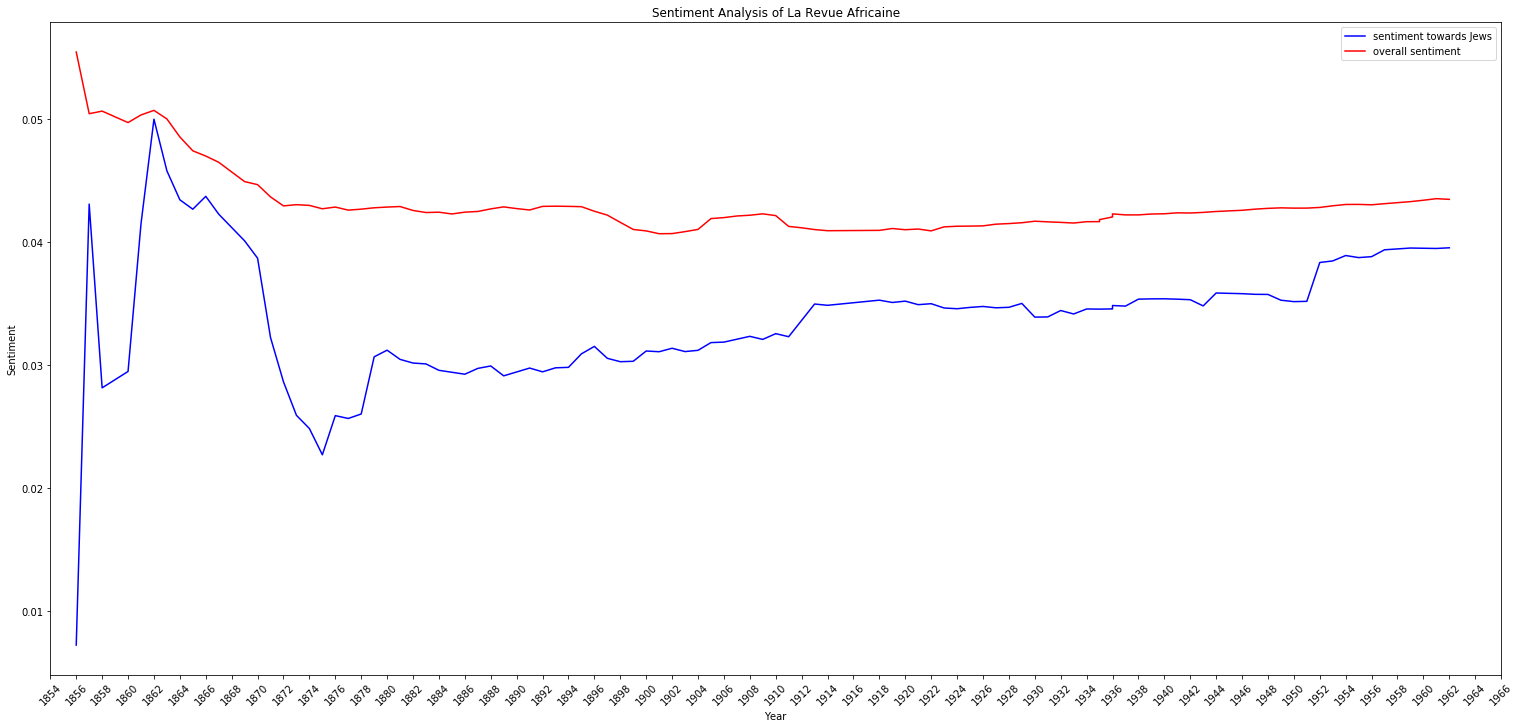

In [ ]:
#Making the Line graph to display our results
ax = plt.gca()
df_juif.plot(kind='line',x='year',y='sentiment towards Jews', figsize=(26, 12),color= 'blue',ax=ax)
df_all.plot(kind='line',x='year',y='overall sentiment', figsize=(26, 12),color= 'red',ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Sentiment")
plt.title("Sentiment Analysis of La Revue Africaine")
plt.xticks(np.arange(1854, 1968, 2))
ax.tick_params(axis ='x', rotation = 45)
plt.show()

In [ ]:
#removing stopwords to create the WordCloud
juif_tok = []

for sentence in juif_list:
  word_tokens = word_tokenize(sentence)
  word_tokens = [w.lower() for w in word_tokens if w.isalpha()]
  #sentence = [w for w in word_tokens if not w in stop_words] 
  sentence = [] 
  for w in word_tokens: 
    if w not in stop_words: 
      #sentence.append(w)
      juif_tok.append(w)
  #print(sentence)
  #juif_tok.append(sentence)


juif_detok = TreebankWordDetokenizer().detokenize(juif_tok)

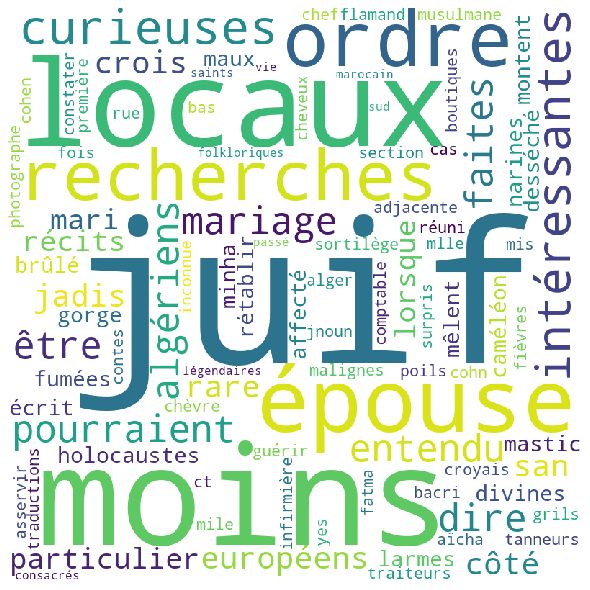

In [ ]:
#Creating the wordcloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(juif_detok) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
#Summary - to skim the text easily
blob = TextBlob(df.iloc[81]['body'])
nouns = list()
for word, tag in blob.tags: #tagging the text
  if tag == 'NN': 
    nouns.append(word.lemmatize()) #retrieving nouns

print ("This article is about...")
for item in random.sample(nouns, 5): #randomly choosing 5
  word = Word(item)
  print (word.pluralize())

This article is about...
peuts
corps
légendes
investitures
brosses


# **Statistics Attempt**

In [ ]:
#Statistics
import random
sennumb_juifs = 0.0
totalsentiment_juif2 = 0.0
year_list = []
polarity_list = []
i = 0
for index, row in df_juif.iterrows():
  for i in range(5):
    body = row['body'] #put text of cell in variable body
    year = row['year']
    sentence_list_dfjuif = [] #initialise sentence list from the juif dataframe, not all of them contain the word juif
    for v in sent_tokenize(body, language = 'french'): #sentence tokenize body into a list of sentences.
        sentence_list_dfjuif.append(v) #append each sentence to list sentence_list
    keywords = ["juif","JUIF", "Juif"]
    juif_liststats = [] #initialize juif_list list of sentences containing juif
    #for sentence in sentence_list_dfjuif:
    random_sentence = random.choice(sentence_list_dfjuif) 
    for i in range(10): 
      for keyword in keywords:
        if keyword in random_sentence:
          juif_liststats.append(random_sentence)
          blob = TextBlob(random_sentence, pos_tagger = PatternTagger(), analyzer=PatternAnalyzer())
          totalsentiment_juif2 = totalsentiment_juif2 + float(str(blob.sentiment[0])) #add sentiments 
          sennumb_juifs = sennumb_juifs + 1 #number of sentences to get the mean of each year
      avg_sent_juif = totalsentiment_juif/counter_juif 
      polarity_list.append(avg_sent_juif)
    year_list.append(polarity_list)
    i = i + 1